In [110]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Detect concept change for attributes stream data


In [150]:
#### Function to get detect concept change for attributes data
#### Assign char a,b,c to uniformly distributed value seperately for all data points first
#### Then, group data samples into sub group first,with each group has n data points,calculate the average of each subgroup
#### Therefore we get a new continous data array named sample
#### Plot the sample and a shift can be seen obviously
#### To-do: Experiment using p chart, or Shewart chart or CUSUM or other methods to detect the change position
#### and in Douglas C. Montgomery Statistical Quality Control 6th Edition Page 400-Page 417 Chapter Time-Weighted Control Charts
#### Tunable Parameters:
#### n : subgroup sample size n 
#### t: The first t data points be selected as baseline
## posTriple2_160,posTriple_175, posTripleDouble_175, negTriple,negWithRare,negBinary Verified

def shiftDetectAtt(lines):
    
    np.random.seed(123456789)

    data = [] # Initiate an array "data" to hold original attributes data 
    for x in lines:
        if x == 'a':    #  # Convert char a to a random number from 0 to 1 and append to data array
            #data.append(0) 
            data.append(np.random.uniform(0,1,1))
        if x == 'b':     # Convert char b to a random number from 1 to 2 and append to data array
            #data.append(1)
            data.append(np.random.uniform(1,2,1))
        if x == 'c':    # Convert char c to a random number from 2 to 3 and append to data array
            #data.append(2)
            data.append(np.random.uniform(2,3,1))
        

    n = 14 # Tunable parameter to group each n+1 data points into a new sample point
    m = len(data)/(n+1) # Number of samples converted from original data
    sample = [] # A new array to hold continous data converted from attributes data

    ## Fill in the new sample data array converted from original attributes data
    for i in range(int(m)):
        if i == 0:
            sample.append(sum(data[:n])/(n+1))   # Append the average values of each n+1 data points
        else:
            sample.append(sum(data[i*n+1:(i+1)*n])/(n+1))  # Append the average values of each n+1 data points

    print("Converted variable values are" + str(sample))

    t = 4 # Choose the first t+1 numbers of sample points as baseline

    ## Calculate control limits using P chart method
    mean = np.average(sample[:t]) # Get the mean of baseline data
    sd = np.std(sample[:t])
    #UCL = mean + 3*np.sqrt(mean*(1-mean)/(n+1)) # Upper control limit in P chart, does not work for negtriple, tripledouble
    #LCL = mean - 3*np.sqrt(mean*(1-mean)/(n+1)) # Lower control limit in P chart,does not work for negtriple, tripledouble
    UCL = mean + 3*sd # Upper control limit in Shewart method
    LCL = mean - 3*sd # Lower control limit in Shewart method


    print("mean is in Shewart method:" + str(mean)) # Print the mean value of the control chart
    print("UCL is in Shewart method: " + str(UCL))  # Print the UCL value of the control chart
    print("LCL is in Shewart method: " + str(LCL))  # Print the LCL value of the control chart
    print(str(range(t+1,len(sample))))
    print(str(sample[5]))
    
    #N = [] # Array to record outside threhold points index in a trend
    n = 0 # index starts from 0 which means not a point outsidte threshold
    ## Detect if there is concept change occurs after the baseline sample points
    for i in range(t+1,len(sample)):
        if (sample[i] >= UCL) | (sample[i] <= LCL): # If there is a point outside threshold
            n = n + 1
            #N.append(n)
            if n == 3: # If it is the consecutive 3rd point that is outside threshold
                print("Concept change occured at position " + str((i-2)*(n+1)) + "of original attributes data")
                print("That corresponds to the "+str(i-2)+"th position on the converted data graph below")
                print("The change occur sample value is"+str(sample[i-2]))
                plt.plot(sample) # Plot the converted variable smaple data 
                plt.plot([0, len(sample)], [UCL, UCL], 'r--', color='r')  # Plot the Upper Control Limit
                plt.plot([0, len(sample)], [LCL, LCL], 'r--', color='r') # Plot the Lower Control LIMIT
                plt.text(1, UCL - 0.05, 'UCL',color='r') # Label out UCL 
                plt.text(1, LCL + 0.05, 'LCL',color='r') # Label out LCL 
                plt.title("Converted Variable Plot from Original Attributes Data,Change Ocurred")
                plt.show()
                return
        else:
            n = 0
        
            
    
    print("No Change")
    plt.plot(sample) # Plot the converted variable smaple data 
    plt.plot([0, len(sample)], [UCL, UCL], 'r--', color='r')  # Plot the Upper Control Limit
    plt.plot([0, len(sample)], [LCL, LCL], 'r--', color='r') # Plot the Lower Control LIMIT
    plt.text(1, UCL - 0.05, 'UCL',color='r') # Label out UCL 
    plt.text(1, LCL + 0.05, 'LCL',color='r') # Label out LCL 
    plt.title("Converted Variable Plot from Original Attributes Data")
    plt.show()

    return




  

Converted variable values are[array([ 1.13609049]), array([ 0.78834272]), array([ 1.03071131]), array([ 1.09551696]), array([ 0.94734628]), array([ 1.00795232]), array([ 0.70951914]), array([ 1.16689971]), array([ 1.15685959]), array([ 0.88990495]), array([ 0.91420452]), array([ 0.75099356]), array([ 0.49374622]), array([ 0.81785645]), array([ 0.60462383]), array([ 0.5366467]), array([ 0.67840606]), array([ 0.65145783]), array([ 0.6734874]), array([ 0.39303896]), array([ 0.77708397])]
mean is in Shewart method:1.0126653702
UCL is in Shewart method: 1.4172330692
LCL is in Shewart method: 0.608097671199
range(5, 21)
[ 1.00795232]
No Change


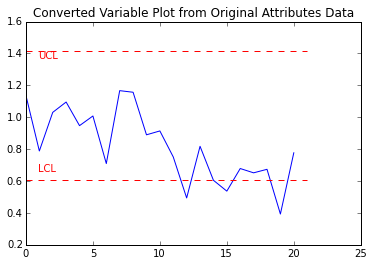

In [151]:
    with open('posBinary_150.txt') as f: # Open file as f
        lines = f.read().splitlines()  # Split file line by line and put lines in to var "lines"
    f.close() # Close file
    
    shiftDetectAtt(lines)
    